In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [2]:
def euler(n,x,y,w_x,w_y,h,title):
    
    #Create empty arrays in order to save the trajectory coordinates
    X = np.zeros(n) 
    Y = np.zeros(n)
    
    #For-loop for integrating
    for i in range(n):

        r = np.sqrt(x**2+y**2) #Distance between the two bodies

        X[i] = x #save value to array
        w_x = w_x - x/(r)**3 * h #calculate new velocity
        x = x + w_x * h #calculate new coordinate
    
        Y[i] = y #save value to array
        w_y = w_y - y/(r)**3 * h #calculate new velocity
        y = y + w_y * h #calculate new coordinate
        
        #Calculate eccentricity
        s = np.array([x,y,0]) #3D position vector to do cross-product
        w = np.array([w_x,w_y,0]) #3D velocity vector
        e = np.cross(w,np.cross(s,w))-s #Runge-Lenz-vector
        if i==n-1: print("Eccentrity ~",np.round(np.linalg.norm(e),6)) #Print value
        
        #Calculate energy
        E = (w_x**2+w_y**2)/2+1/np.sqrt(x**2+y**2) #Energy
        e_i=np.abs(E-E_0)/np.abs(E_0) #Relative error
        if i==n-1: print("Energy =",E,", e_i =",e_i) #Print out
    
    #Plot 
    plt.plot(X,Y, color="darkorange", label="Kepler orbit\n$e\\approx${}".format(np.round(np.linalg.norm(e),4)))
    plt.title("Euler methode with $n={}, \\Delta t={}, v_0=(0,{})$".format(n,h,w_0))
    plt.axis("equal")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

Initial energy E_0 = 1.5
Eccentrity ~ 0.006688
Energy = 1.5065798384798426 , e_i = 0.004386558986561706


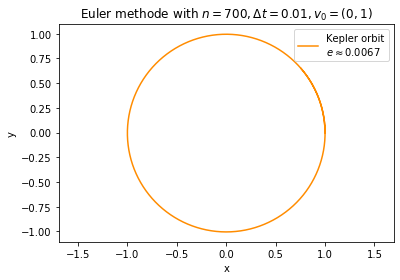

In [3]:
#Initializing values
title = "euler.pdf"
n = 700
x = 1
y = 0
w_x = 0
w_y = 1
h = 0.01
e=0 #Intialize eccentricity 
w_0=w_y #Initialize velocity

#Calculate initial Energy
E_0 = (w_x**2+w_y**2)/2+1/np.sqrt(x**2+y**2)
print("Initial energy E_0 =",E_0)

euler(n,x,y,w_x,w_y,h,title)   

In [4]:
#Function to calculate relative error in energy
#t = loop-variable
def error(n,x,y,w_x,w_y,h,t):

    for i in range(n):
        #Step-by-step euler
        r = np.sqrt(x**2+y**2)
        
        w_x = w_x - x/(r)**3 * h
        x = x + w_x * h
    
        w_y = w_y - y/(r)**3 * h
        y = y + w_y * h
        
        #Eccentricity
        s = np.array([x,y,0])
        w = np.array([w_x,w_y,0])
        e = np.cross(w,np.cross(s,w))-s
        if i==n-1: print("Eccentrity ~",np.round(np.linalg.norm(e),6))
        
        #Energy
        E = np.linalg.norm(w)**2/2+1/np.linalg.norm(w)
        e_i=np.abs(E-E_0)/np.abs(E_0)
        if i==n-1: print("Energy =",E,", e_i =",e_i)
        dE[t] = e_i #Save energy in an array
        time[t] = h #Save stepsize in an array

Initial energy E_0 = 1.5
Eccentrity ~ 0.065072
Energy = 1.501506931353755 , e_i = 0.001004620902503343
Initial energy E_0 = 1.5
Eccentrity ~ 0.006688
Energy = 1.5000161773479164 , e_i = 1.0784898610912327e-05
Initial energy E_0 = 1.5
Eccentrity ~ 0.000668
Energy = 1.5000001618634093 , e_i = 1.0790893956169612e-07
[0.1   0.01  0.001] [1.00462090e-03 1.07848986e-05 1.07908940e-07]


Text(0, 0.5, 'Relative error $e_i=\\frac{\\|E_i-E_0\\|}{\\|E_0\\|}$')

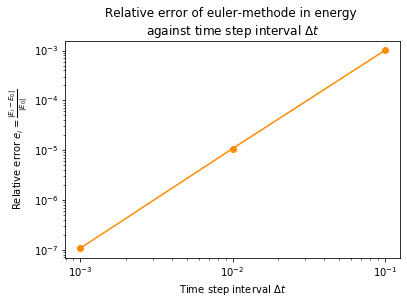

In [5]:
#Initializing values
n=70
w_y=1
h=0.1
dE = np.zeros(3)
time = np.zeros(3)

#Iterate over different steps and stepsizes
for t in range(3):
    E_0 = np.linalg.norm(np.array([w_x,w_y]))**2/2+1/np.linalg.norm(np.array([x,y]))
    print("Initial energy E_0 =",E_0)
    error(n*10**t,x,y,w_x,w_y,h*10**-t,t)

#Print values
print(time,dE)

#Plot
plt.plot(time,dE, "o-", color="darkorange")
plt.xscale("log")
plt.yscale("log")
plt.title("Relative error of euler-methode in energy \nagainst time step interval $\\Delta t$")
plt.xlabel("Time step interval $\\Delta t$")
plt.ylabel("Relative error $e_i=\\frac{\\|E_i-E_0\\|}{\\|E_0\\|}$")

In [6]:
def rk4_step(y0, t, f, h, f_args = {}):

    k1 = h * f(y0, t, **f_args)
    k2 = h * f(y0 + k1/2., t + h/2., **f_args)
    k3 = h * f(y0 + k2/2., t + h/2., **f_args)
    k4 = h * f(y0 + k3, t + h, **f_args)
    
    xp1 = t + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, t, f, h, n, f_args = {}):

    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = t
    E2 = np.zeros((n+1, 2))
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], t = xn[n-1], f = f, h = h, f_args = f_args)
       # if len(yn[n,:])==12:
         #   E2[n, :] = energy(yn[n,:])
     #   p#rint(yn[n,:])
    return(yn, xn)#, E2)



In [7]:
#Initial values
m_sun = 1.989e30
m1 = 1 # Sun
m2 = 5.972e24/m_sun #Earth
m3 = 1898e24/m_sun #Juptier

# Sun 
x1 = -5.007577617810492E-03 
y1 = 7.041228482837261E-03 
z1 = 5.685007691060380E-05
vx1 = -8.121331364052478E-06 
vy1 = -3.516902274367173E-06
vz1 = -4.244990856328074E-08

# Earth
x2 = -4.187433713775116E-01 
y2 = -9.179093487828729E-01 
z2 = 9.933100695863397E-05
vx2 = 1.542251248957594E-02 
vy2 = -7.089878160059173E-03 
vz2 = -4.244990856328074E-08
    
# Jupiter
x3 = 1.592415691138917E+00 
y3 = -4.913804665529836E+00 
z3 = -1.524474775383802E-02
vx3 = 7.085717607889679E-03 
vy3 = 2.684427718594668E-03
vz3 =-1.696905959266383E-04

In [8]:
#Define universal gravitation constant
G = 6.67408e-11 #N-m2/kg2

#Net constants
K1 = 0.01720209895**2 #G*t_nd*m_nd/(r_nd**2*v_nd)
K2 = 1#v_nd*t_nd/r_nd

In [9]:
#Define initial position vectors
r1 = [x1,y1,z1] #m
r2 = [x2,y2,z2] #m

#Convert pos vectors to arrays
r1 = np.array(r1,dtype="float64")
r2 = np.array(r2,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2)/(m1+m2)

#Define initial velocities
v1=[vx1,vy1,vz1] #m/s
v2=[vx2,vy2,vz2] #m/s

#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

In [10]:
#A function defining the equations of motion 
def TwoBodyEquations(w,t,G,m1,m2):
    r1=w[:3]
    r2=w[3:6]
    v1=w[6:9]
    v2=w[9:12]    
    
    r=np.linalg.norm(r2-r1) #Calculate magnitude or norm of vector 
    
    dv1bydt=K1*m2*(r2-r1)/r**3
    dv2bydt=K1*m1*(r1-r2)/r**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2    
    
    r_derivs=np.concatenate((dr1bydt,dr2bydt))
    derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
    
    return derivs

In [11]:
#Package initial parameters
init_params = np.array([r1,r2,v1,v2]) #create array of initial params
init_params = init_params.flatten() #flatten array to make it 1D
h = 1
n = 5000

two_body_sol, t = rk4(init_params, 0, TwoBodyEquations, h, n, f_args = {"G":K1, "m1": m1, "m2": m2})

In [12]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]

In [13]:
#Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
#Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol#-rcom_sol
#Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol#-rcom_sol

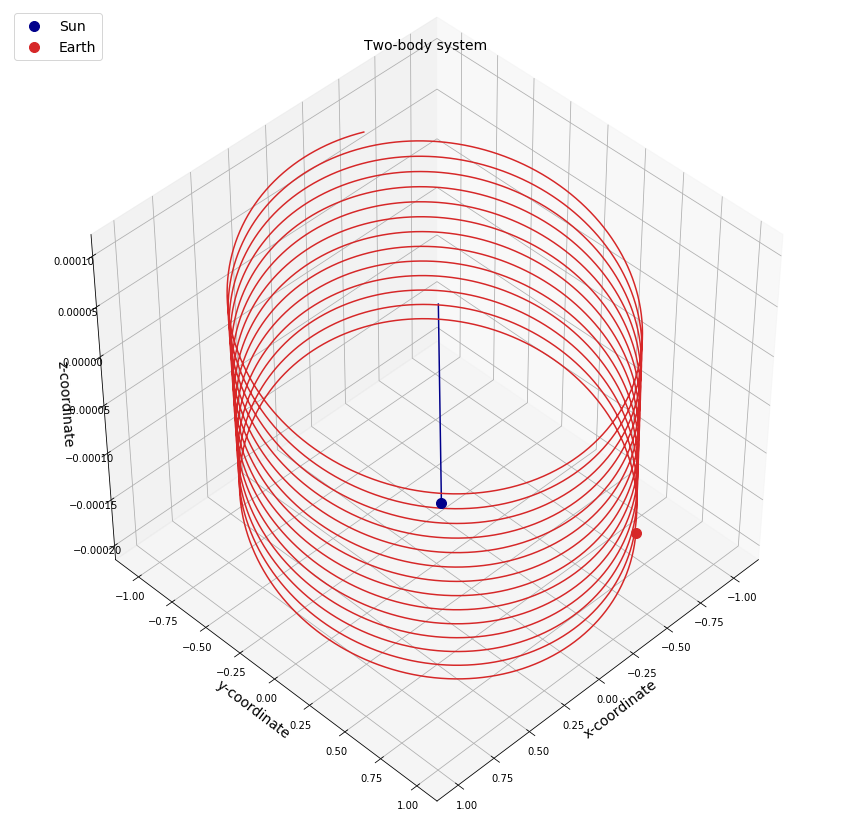

In [14]:
%matplotlib qt

#Create figure
fig=plt.figure(figsize=(15,15))
#Create 3D axes
ax=fig.add_subplot(111,projection="3d")

#Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")

#Plot the final positions of the stars
ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Sun")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Earth")
#Add a few more bells and whistles
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Two-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
ax.view_init(45, 45)

In [15]:
# Position of Jupiter
r3=[x3,y3,z3] #m
r3=np.array(r3,dtype="float64")
# Velocity of Jupiter
v3=[vx3,vx3,vx3]
v3=np.array(v3,dtype="float64")

In [16]:
# Update COM formula
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

# Update velocity of COM formula
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

In [17]:
def ThreeBodyEquations(w,t,G,m1,m2,m3):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]    
    
    r12=np.linalg.norm(r2-r1)
    r13=np.linalg.norm(r3-r1)
    r23=np.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3    
    
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    return derivs

In [18]:
# Package initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array

three_body_sol, b=rk4(init_params, 0, ThreeBodyEquations, 1, 4300, f_args = {"G":K1, "m1": m1, "m2": m2, "m3":m3})

In [19]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]

In [20]:
# Find location of COM
rcom_sol=(m1*r1_sol+m2*r2_sol+m3*r3_sol)/(m1+m2+m3)
# Find location of Alpha Centauri A w.r.t COM
r1com_sol=r1_sol#-rcom_sol
# Find location of Alpha Centauri B w.r.t COM
r2com_sol=r2_sol#-rcom_sol
r3com_sol=r3_sol#-rcom_sol

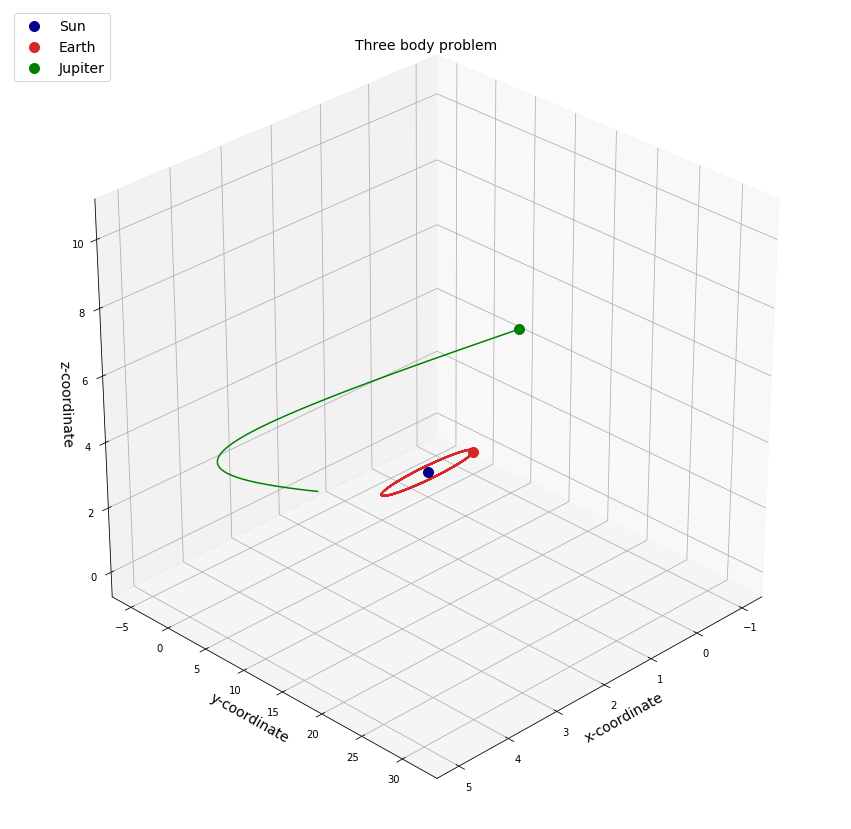

In [21]:
# Create figure
fig=plt.figure(figsize=(15,15))
# Create 3D axes
ax=fig.add_subplot(111,projection="3d")
# Plot the orbits
ax.plot(r1com_sol[:,0],r1com_sol[:,1],r1com_sol[:,2],color="darkblue")
ax.plot(r2com_sol[:,0],r2com_sol[:,1],r2com_sol[:,2],color="tab:red")
ax.plot(r3com_sol[:,0],r3com_sol[:,1],r3com_sol[:,2],color="GREEN")
# Plot the final positions of the stars

ax.scatter(r1com_sol[-1,0],r1com_sol[-1,1],r1com_sol[-1,2],color="darkblue",marker="o",s=100,label="Sun")
ax.scatter(r2com_sol[-1,0],r2com_sol[-1,1],r2com_sol[-1,2],color="tab:red",marker="o",s=100,label="Earth")
ax.scatter(r3com_sol[-1,0],r3com_sol[-1,1],r3com_sol[-1,2],color="green",marker="o",s=100,label="Jupiter")

ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Three body problem\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)
ax.view_init(30,45)